Author: Harshit Tripathi

Text Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments = pd.read_csv('C:/Users/Asus/Downloads/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head(10)

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0


In [4]:
comments['likes'].max()

60630

In [5]:
comments.tail()

,video_id,comment_text,likes,replies
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0
718449,lLN1FwiqGwc,That meme me dace 😂,0,0
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0
718451,lLN1FwiqGwc,WA-HA\nWA-HA\nWA-HA,1,0


In [6]:
comments['comment_text'].iloc[60630]

'Liked it before watching it cause I love what I eat in a day vids/vlogs 👌🏼'

In [7]:
from textblob import TextBlob

In [8]:
TextBlob('Liked it before watching it cause I love what I eat in a day vids/vlogs 👌🏼').sentiment

Sentiment(polarity=0.55, subjectivity=0.7)

In [9]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [10]:
comments.dropna(inplace=True)

In [11]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [12]:
comments['polarity']=polarity

In [13]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [14]:
comments_positive=comments[comments['polarity']==1]

In [15]:
!pip install wordcloud

In [16]:
    from wordcloud import WordCloud , STOPWORDS

In [17]:
stopwords=set(STOPWORDS)

In [18]:
total_string=' '.join(comments_positive['comment_text'])

In [19]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_string)

(-0.5, 999.5, 499.5, -0.5)

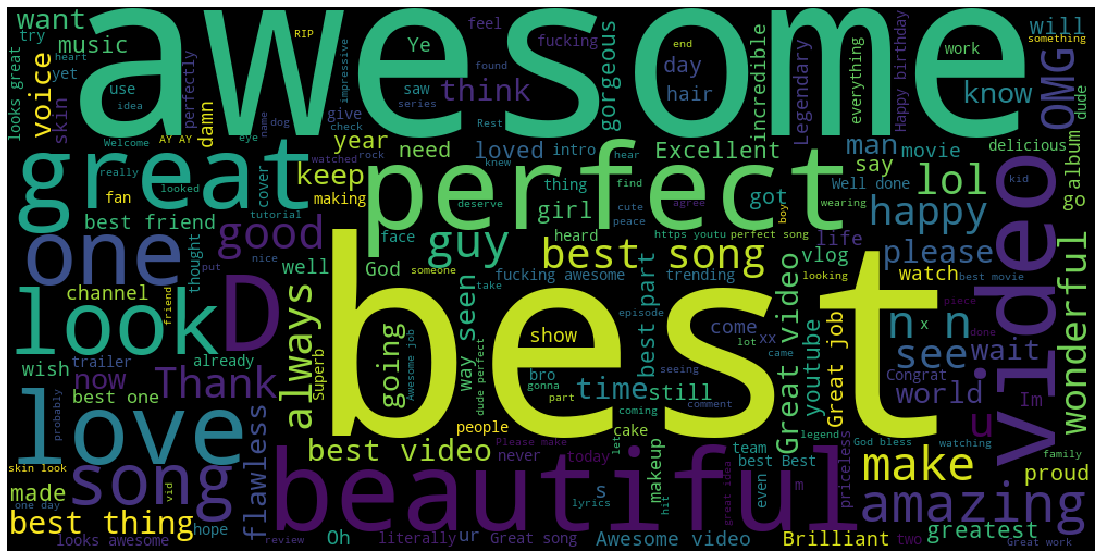

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
#These are the words which have high polarity among all.

In [21]:
comments_negative=comments[comments['polarity']== -1]

In [22]:
total_string=' '.join(comments_negative['comment_text'])

In [23]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_string)

(-0.5, 999.5, 499.5, -0.5)

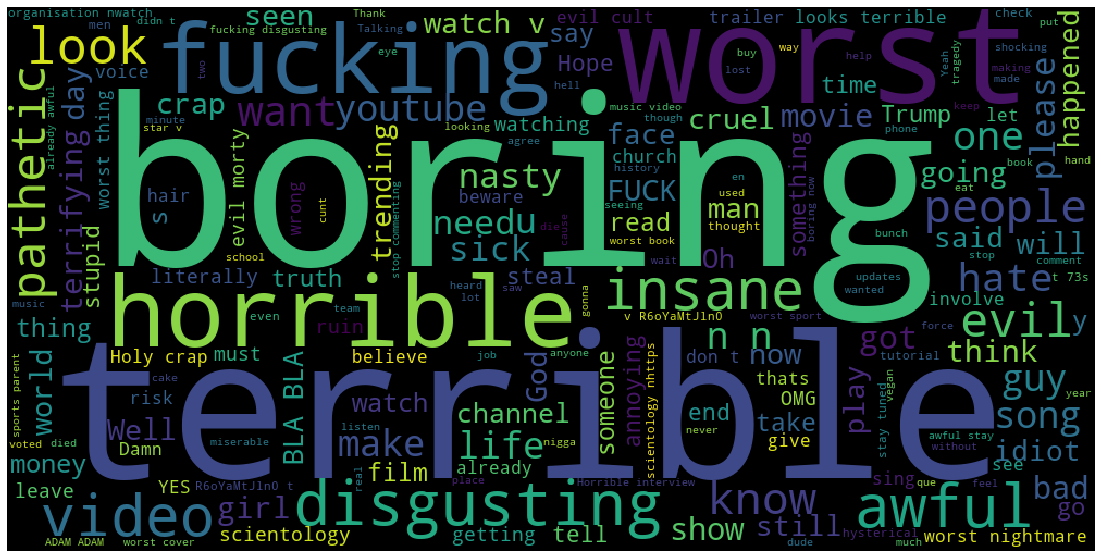

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
#These are the words which have lowest polarity among all.